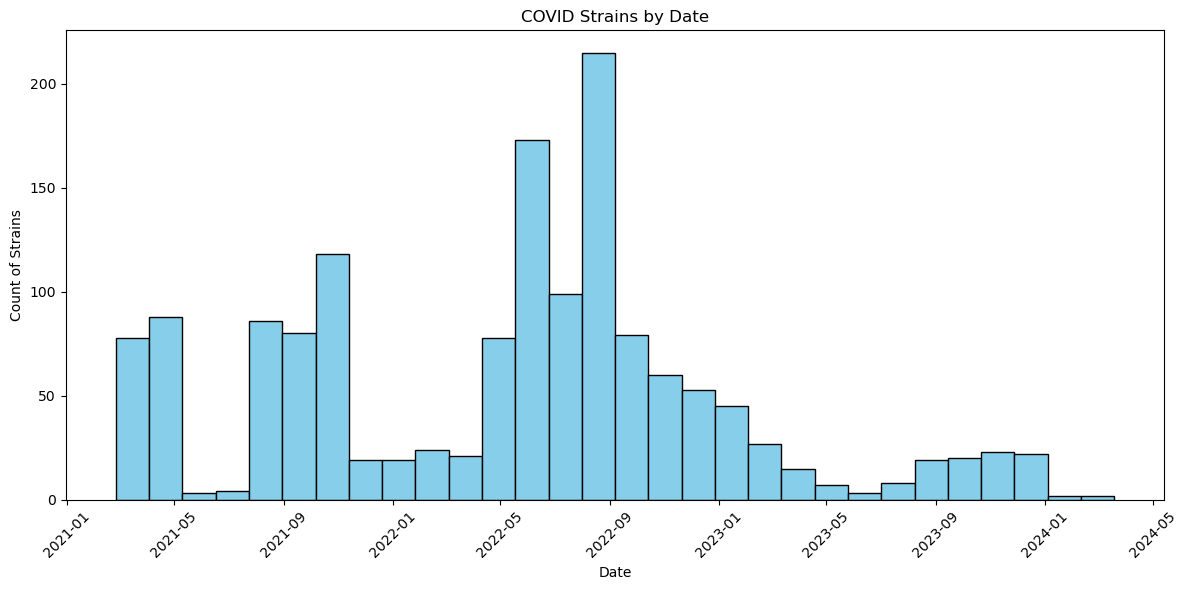

In [1]:
# This script plays with the metadata and makes a few histograms about the information provided in the data set

import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV file
file_path = "enhanced_metadata_mcleod.tsv"
df = pd.read_csv(file_path, sep='\t')

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['date'], bins=30, color='skyblue', edgecolor='black')

# Formatting
plt.title('COVID Strains by Date')
plt.xlabel('Date')
plt.ylabel('Count of Strains')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

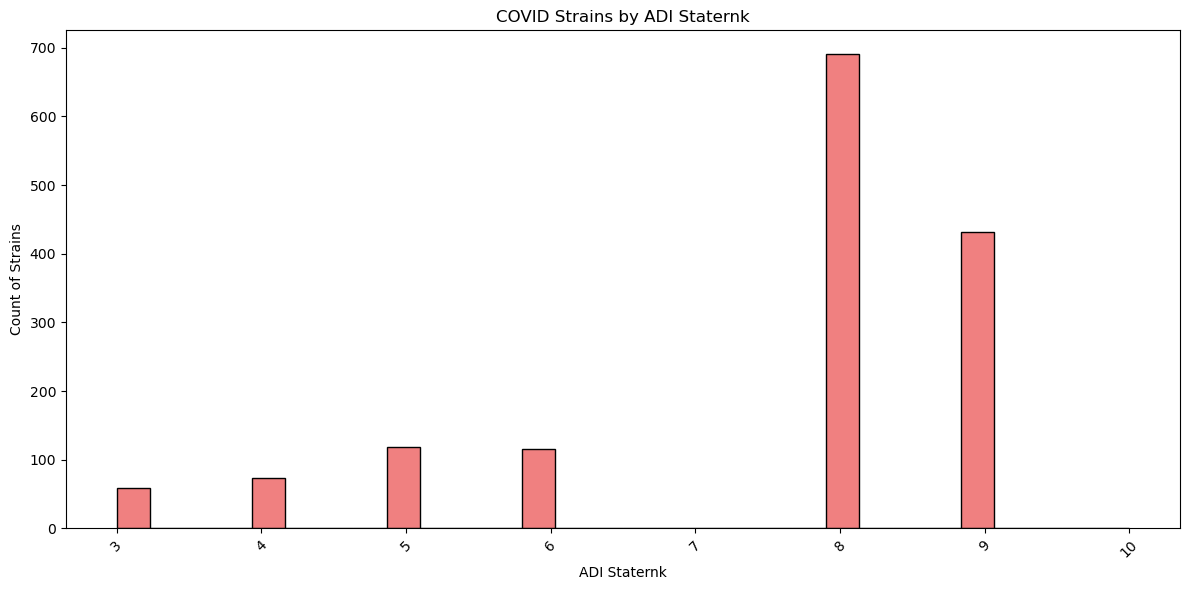

In [2]:
# Drop rows with missing 'adi_staternk' values
df = df.dropna(subset=['adi_staternk'])

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['adi_staternk'], bins=30, color='lightcoral', edgecolor='black')

# Formatting
plt.title('COVID Strains by ADI Staternk')
plt.xlabel('ADI Staternk')
plt.ylabel('Count of Strains')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

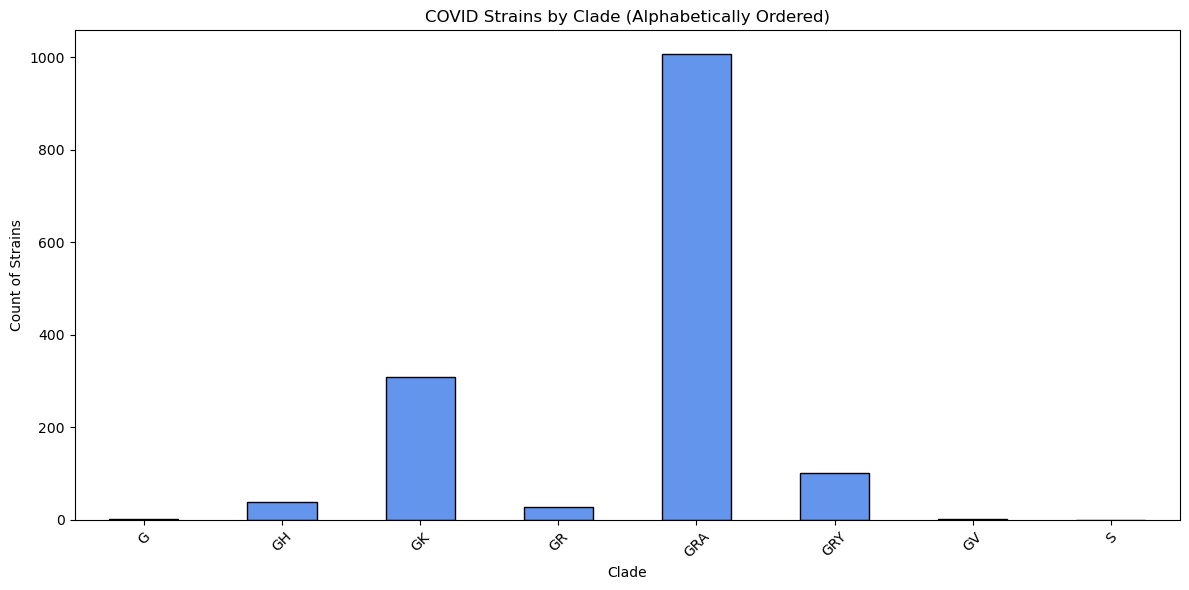

In [3]:
# Drop rows with missing 'Clade' values
df = df.dropna(subset=['Clade'])

# Sort the clades alphabetically
clade_counts = df['Clade'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(12, 6))
clade_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Formatting
plt.title('COVID Strains by Clade (Alphabetically Ordered)')
plt.xlabel('Clade')
plt.ylabel('Count of Strains')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

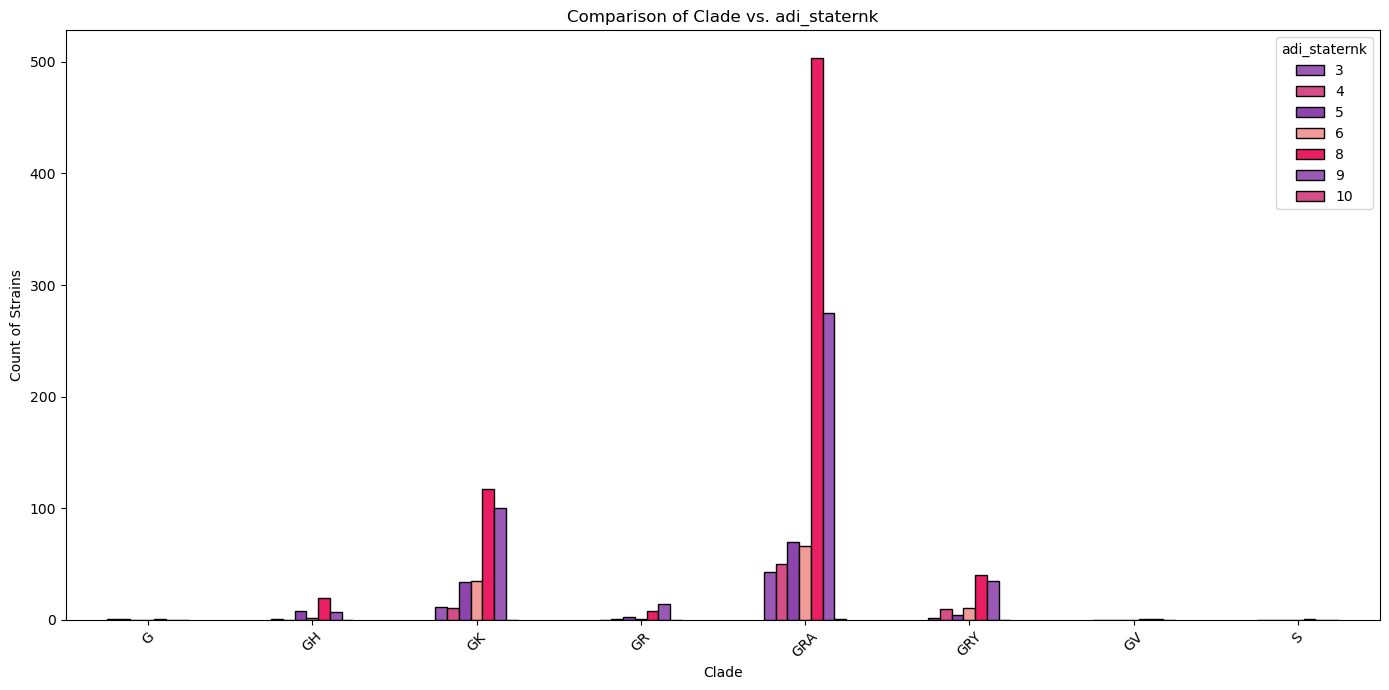

In [5]:
import seaborn as sns

# Drop rows with missing 'Clade' or 'adi_staternk' values
df = df.dropna(subset=['Clade', 'adi_staternk'])

# Create a contingency table
clade_adi_counts = pd.crosstab(df['Clade'], df['adi_staternk'])

# Use seaborn color palette for light purples and pinks
colors = ['#9B59B6', '#D64E87', '#8E44AD', '#F29C9A', '#E91E63']  # Contrasting purples and pinks

# Plotting
ax = clade_adi_counts.plot(kind='bar', figsize=(14, 7), color=colors[:len(clade_adi_counts.columns)], edgecolor='black')

# Formatting
plt.title('Comparison of Clade vs. adi_staternk')
plt.xlabel('Clade')
plt.ylabel('Count of Strains')
plt.xticks(rotation=45)
plt.legend(title='adi_staternk')
plt.tight_layout()

# Display the plot
plt.show()

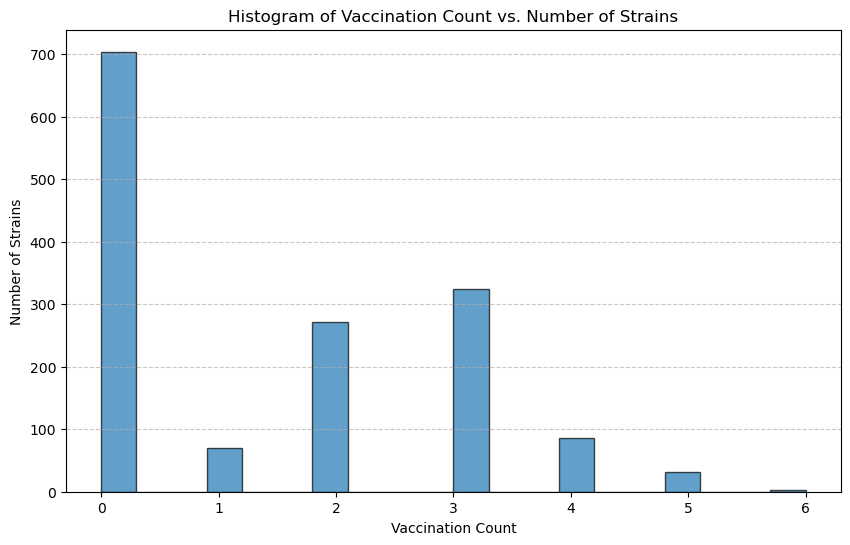

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the column exists
if 'vbt_vax_count' in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    plt.hist(df['vbt_vax_count'].dropna(), bins=20, edgecolor='black', alpha=0.7)
    
    plt.xlabel('Vaccination Count')
    plt.ylabel('Number of Strains')
    plt.title('Histogram of Vaccination Count vs. Number of Strains')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()
else:
    print("Column 'vbt_vax_count' not found in dataset.")

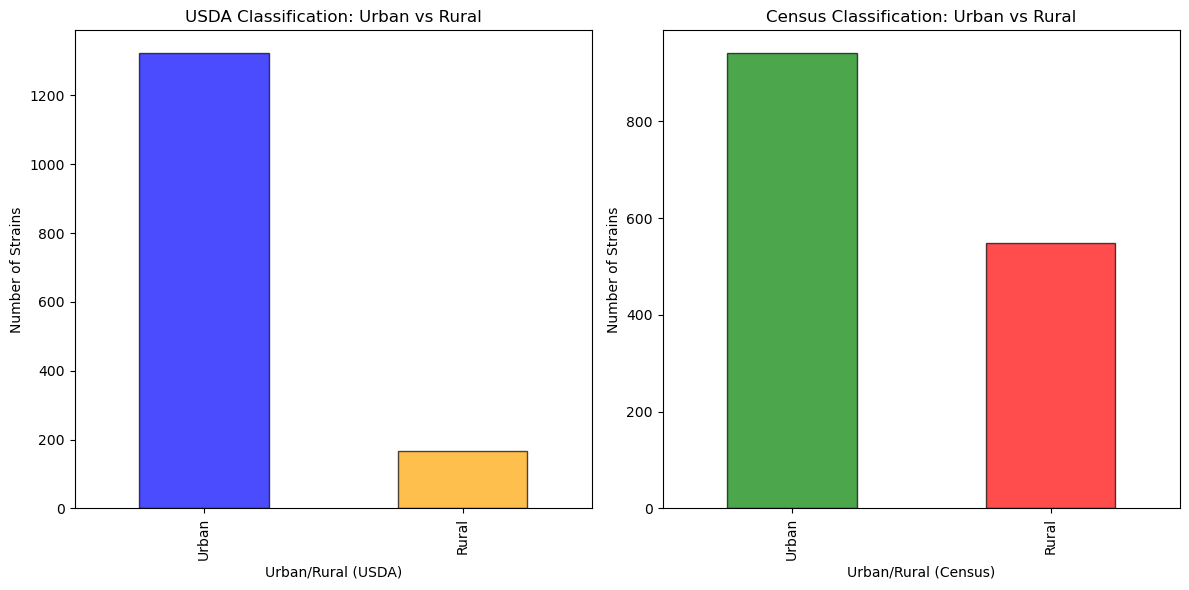

In [7]:
# Ensure the necessary columns exist
if 'Urban_or_Rural_USDA_Classification' in df.columns and 'Urban_or_Rural_Census_Classification' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for USDA classification
    plt.subplot(1, 2, 1)
    df['Urban_or_Rural_USDA_Classification'].value_counts().plot(kind='bar', color=['blue', 'orange'], edgecolor='black', alpha=0.7)
    plt.xlabel('Urban/Rural (USDA)')
    plt.ylabel('Number of Strains')
    plt.title('USDA Classification: Urban vs Rural')
    
    # Plot histogram for Census classification
    plt.subplot(1, 2, 2)
    df['Urban_or_Rural_Census_Classification'].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor='black', alpha=0.7)
    plt.xlabel('Urban/Rural (Census)')
    plt.ylabel('Number of Strains')
    plt.title('Census Classification: Urban vs Rural')
    
    plt.tight_layout()
    plt.show()
else:
    print("One or both urban/rural classification columns not found in dataset.")

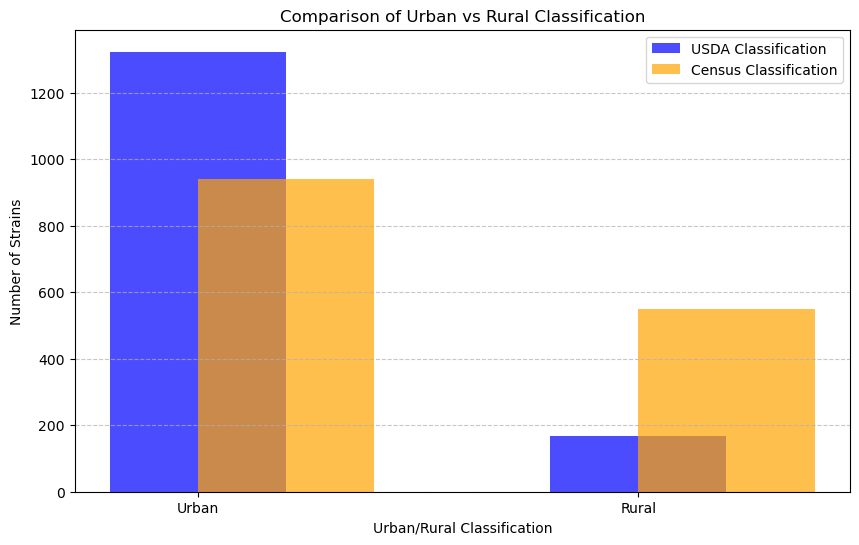

In [8]:
# Ensure the necessary columns exist
if 'Urban_or_Rural_USDA_Classification' in df.columns and 'Urban_or_Rural_Census_Classification' in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Combine both classifications into a single histogram
    urban_rural_usda = df['Urban_or_Rural_USDA_Classification'].value_counts()
    urban_rural_census = df['Urban_or_Rural_Census_Classification'].value_counts()
    
    labels = list(set(urban_rural_usda.index).union(set(urban_rural_census.index)))
    usda_values = [urban_rural_usda.get(label, 0) for label in labels]
    census_values = [urban_rural_census.get(label, 0) for label in labels]
    
    x = range(len(labels))
    plt.bar(x, usda_values, width=0.4, label='USDA Classification', color='blue', alpha=0.7, align='center')
    plt.bar(x, census_values, width=0.4, label='Census Classification', color='orange', alpha=0.7, align='edge')
    
    plt.xticks(x, labels)
    plt.xlabel('Urban/Rural Classification')
    plt.ylabel('Number of Strains')
    plt.title('Comparison of Urban vs Rural Classification')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()
else:
    print("One or both urban/rural classification columns not found in dataset.")

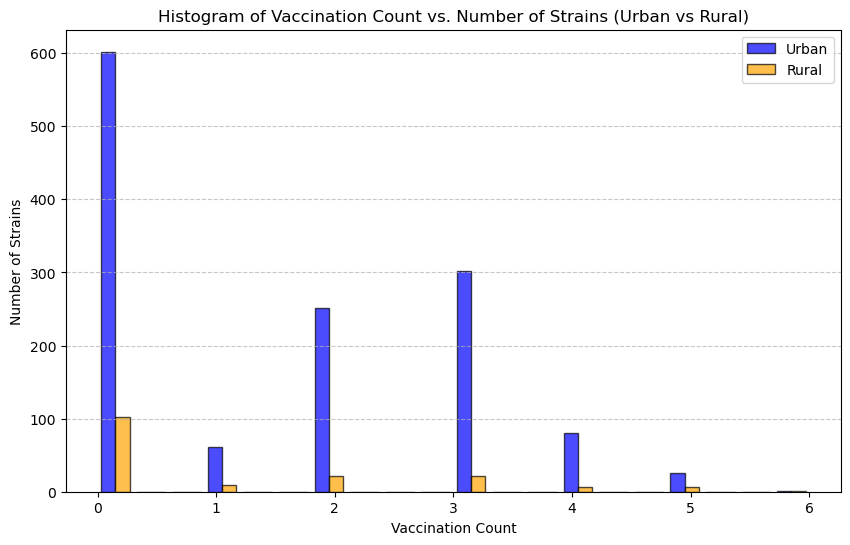

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the necessary columns exist
if 'Urban_or_Rural_USDA_Classification' in df.columns and 'vbt_vax_count' in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Separate data by urban and rural
    urban_data = df[df['Urban_or_Rural_USDA_Classification'] == 'Urban']['vbt_vax_count'].dropna()
    rural_data = df[df['Urban_or_Rural_USDA_Classification'] == 'Rural']['vbt_vax_count'].dropna()
    
    # Plot histogram
    plt.hist([urban_data, rural_data], bins=20, edgecolor='black', alpha=0.7, label=['Urban', 'Rural'], color=['blue', 'orange'])
    
    plt.xlabel('Vaccination Count')
    plt.ylabel('Number of Strains')
    plt.title('Histogram of Vaccination Count vs. Number of Strains (Urban vs Rural)')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()
else:
    print("One or both required columns not found in dataset.")